## 9장 : 분산분석

In [2]:
import numpy as np
import pandas
num = np.array([45,59,48,46,38,47,21,12,14,17,13,17,37,32,15,25,39,41,16,11,20,21,14,7])
col = np.repeat(range(1,5),np.repeat(6,4))
bugs = pandas.DataFrame({'num':num,'col':col})

In [3]:
# 일원배치분석
import statsmodels.api as sm
from statsmodels.formula.api import ols
model1 = ols('num~C(col)',data=bugs).fit() # C를 써야 배치분석이 된대요
table1 = sm.stats.anova_lm(model1)
print(table1)

            df       sum_sq      mean_sq          F        PR(>F)
C(col)     3.0  4218.458333  1406.152778  30.551934  1.151046e-07
Residual  20.0   920.500000    46.025000        NaN           NaN


In [4]:
# 데이터 작성
y=np.array([64,53,47,51,49,51,45,43,50,48,50,52])
A=np.tile(range(1,5),3)
B=np.repeat(range(1,4),4)
cor=pandas.DataFrame({'A':A,'B':B,'y':y})

In [5]:
#반복이 없는 이원배치 분산분석
model2 = ols('y~C(A)+C(B)',data=cor).fit()
table2 = sm.stats.anova_lm(model2)
print(table2)

           df      sum_sq    mean_sq         F    PR(>F)
C(A)      3.0   83.583333  27.861111  1.357240  0.342215
C(B)      2.0   91.500000  45.750000  2.228687  0.188880
Residual  6.0  123.166667  20.527778       NaN       NaN


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
alz = pandas.read_table("./alzheimer.txt",sep=" ")

In [11]:
alz.groupby("A").agg({"y":["mean","std"]})

y          
       mean       std
A                    
Mozart   11  3.527668
Piano    21  2.309401
easy     22  5.849976

In [12]:
alz.groupby("B").agg({"y":["mean","std"]})

y          
       mean       std
B                    
early    19  8.062258
middle   17  4.375255

In [13]:
alz.groupby(["A","B"]).agg({"y":["mean","std"]})

y          
              mean       std
A      B                    
Mozart early     9  2.549510
       middle   13  3.391165
Piano  early    21  2.236068
       middle   21  2.645751
easy   early    27  2.449490
       middle   17  2.915476

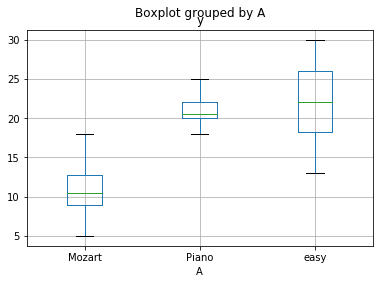

In [14]:
alz.boxplot("y",by="A")

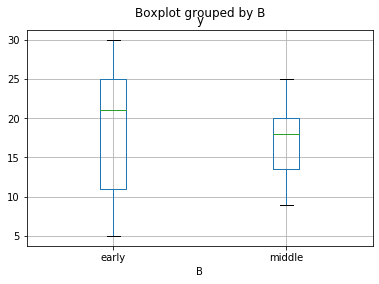

In [15]:
alz.boxplot("y",by="B")

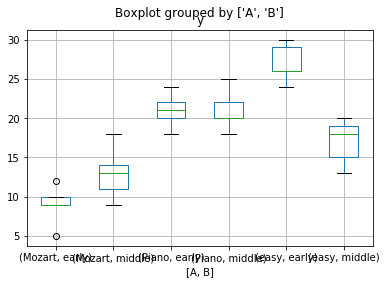

In [16]:
alz.boxplot("y",by=["A","B"])

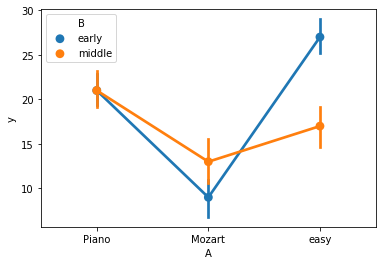

In [17]:
sns.pointplot(x="A",y="y",hue="B",data=alz)

In [18]:
#반복이 있는 이원배치 분산분석
model3=ols('y~C(A)*C(B)',data=alz).fit()
table3=sm.stats.anova_lm(model3)
print(table3)

             df  sum_sq     mean_sq          F        PR(>F)
C(A)        2.0   740.0  370.000000  49.887640  2.824411e-09
C(B)        1.0    30.0   30.000000   4.044944  5.566448e-02
C(A):C(B)   2.0   260.0  130.000000  17.528090  2.029321e-05
Residual   24.0   178.0    7.416667        NaN           NaN
